This is an example of using Monte Carlo simulation to find the power of a clinical trial. The statistical model is

Y1,…,Yn∼N(μ,σ2)

Y1,…,Yn∼N(μ,σ2)

and the hypotheses are

HO:μ=0 versus HA:μ≠0.

HO:μ=0 versus HA:μ≠0.

In this example we assume the variance σ2σ2 is known, and use an uninformative prior for μμ.


[1] 0.823

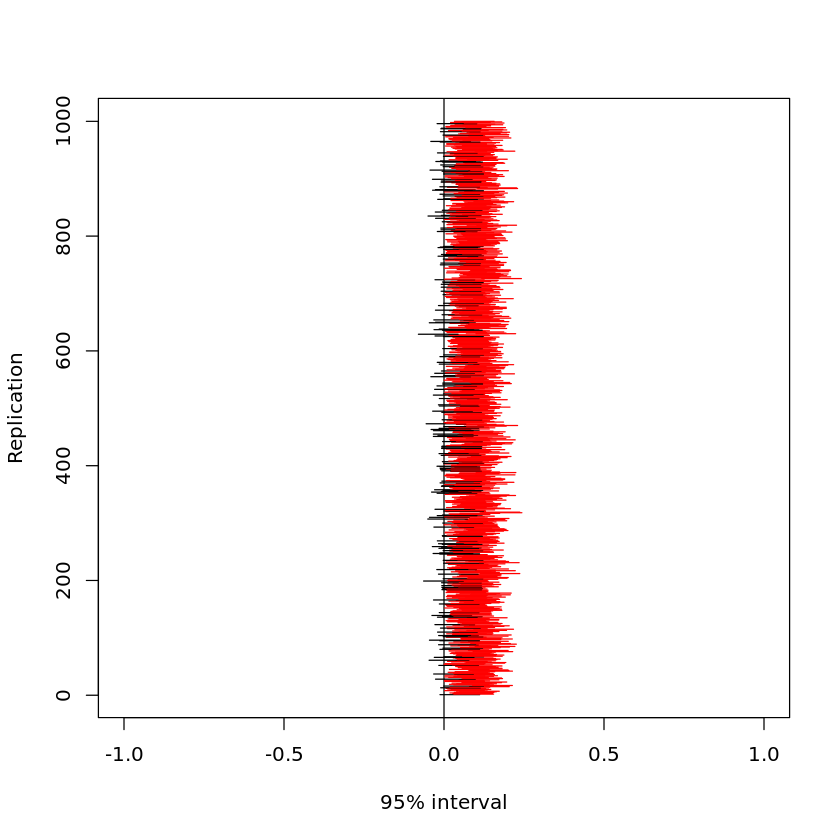

In [27]:
# Simulation settings

N           <- 1000  # Number of MC reps
n           <- 1000  # Sample size
sigma       <- 1    # Error standard devation

true_mu     <- 0.09  # True value of mu

pri.mn.anal <- 0    # Prior for mu
pri.sd.anal <- Inf

# Generate data sets and compute credible sets
 L <- rep(0,N)
 U <- rep(0,N)

 set.seed(0820)

 for(rep in 1:N){

    Y  <- rnorm(n,true_mu,sigma)

   #Compute posterior 95% interval:
    post.var <- 1/(n/sigma^2+1/pri.sd.anal^2)
    post.mn  <- post.var*(pri.mn.anal/pri.sd.anal^2+sum(Y)/sigma^2)
    L[rep]   <- post.mn-1.96*sqrt(post.var)
    U[rep]   <- post.mn+1.96*sqrt(post.var)
 }

# Plot the credible set for each dataset

plot(NA,xlim=c(-1,1),ylim=c(1,N),xlab="95% interval",ylab="Replication")
abline(v=0)

## plot of chunk plot
for(rep in 1:N){
    reject <- L[rep]>0 | U[rep]<0
    lines(c(L[rep],U[rep]),c(rep,rep),col=ifelse(reject>0,2,1))
}

## Compute the power
 mean(L>0 | U<0)

## In a full power analysis, repeat for several true values of μ and n. 
## Often the sample size n is then selected so that the probability of rejecting the null 
## hypothesis (power) is high (say 0.8 or 0.9) for a meaningful true values of μ.